# CSC11 - Introduction to Machine Learning - A1 - Q1

## Polynomial Regression
In this notebook, you are going to use the polynomial regression model that you implemented in the start code, and run several experiments in different settings of dataset size, degree of polynomial, and regularization coefficient. 
The result of these experiments are visualized using `matplotlib` library. 
The goal is to describe the plots, characterize overfitting/undefitting scenarios and explain them.

**Note:** You don't need to change/write any code in the notebook. After each part, you see some questions that you need to answer. Please provide you answer in the markdown cells and share the noteboook.

In [5]:
# import necessary libraries

import numpy as np
from poly_reg import PolynomialRegression
import pickle
import matplotlib.pyplot as plt

def load_pkl(filename):
    with open(filename, "rb") as f:
        loaded_data = pickle.load(f)
    return loaded_data

### Benchmark Loaders
The `load_dataset` function is to load a benchmark. It takes in an id (1 or 2) and loads the corresponding benchmark.
Each benchmark consists of four datasets. Three datasets are for training with various sizes of small, medium and large. And one dataset is used for testing.
We will reuse the function before running each experiment.

In [4]:
def load_dataset(id):
    """
    Args:
        - id (int): The id of the dataset to load.

    Returns:
        - datasets (dict): The small and large train plus test datasets for the given id.
    """
    dataset_dir = f"datasets_{id}"
    datasets = {
        "small_train": load_pkl(f"{dataset_dir}/small_train.pkl"),
        "medium_train": load_pkl(f"{dataset_dir}/medium_train.pkl"),
        "large_train": load_pkl(f"{dataset_dir}/large_train.pkl"),
        "test": load_pkl(f"{dataset_dir}/test.pkl")
    }
    return datasets

### Dataset Size

In the first part, for each benchmark, we employ the implemented regression model and fit it to three training datasets of different sizes. Then the mean squared error is computed for both the training and the test data. The errors are visualized with bar plots.

In [3]:
def data_size_experiment(datasets):
    # keep K fixed
    K = 10
    model = PolynomialRegression(K=K) # model

    train_dataset_list = ["small_train", "medium_train", "large_train"] # three datasets
    n_samples = np.zeros(len(train_dataset_list), dtype=int)
    train_loss = np.zeros(len(train_dataset_list), dtype=float)
    test_loss = np.zeros(len(train_dataset_list), dtype=float)

    # test data
    test_dataset = datasets["test"]
    test_X = test_dataset["X"]
    test_Y = test_dataset["Y"]

    for i, train_dataset in enumerate(train_dataset_list): # iterate over three datasets
        train_dataset = datasets[train_dataset]
        train_X = train_dataset["X"]
        train_Y = train_dataset["Y"]
        model.fit(train_X, train_Y) # least squares fit
        train_loss[i] = model.compute_mse(train_X, train_Y) # mse on train data
        test_loss[i] = model.compute_mse(test_X, test_Y) # mse on test data
        n_samples[i] = len(train_X) 
    return train_loss, test_loss, n_samples

<Figure size 640x480 with 0 Axes>

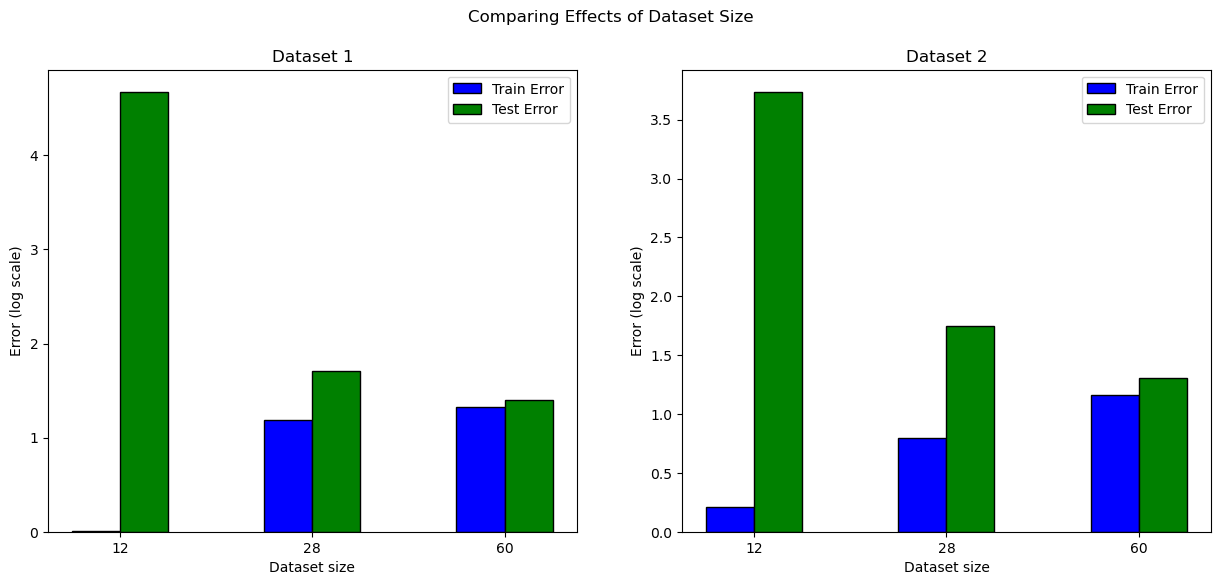

In [6]:
width = 0.25
plt.clf()
data_ids = [1, 2] # two benchmarks
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
for i, data_id in enumerate(data_ids):
    datasets = load_dataset(data_id) # load data
    train_loss, test_loss, n_samples = data_size_experiment(datasets=datasets) # run the experiment
    r = np.arange(len(n_samples))
    axs[i].bar(r, np.log(train_loss+1), color = 'b', width = width, edgecolor = 'black', label='Train Error')
    axs[i].bar(r + width, np.log(test_loss+1), color = 'g', width = width, edgecolor = 'black', label='Test Error')
    axs[i].set_xticks(ticks=r + width/2, labels=n_samples)
    axs[i].set_xlabel("Dataset size")
    axs[i].set_ylabel("Error (log scale)")
    axs[i].set_title(f"Dataset {data_id}")
    axs[i].legend()
plt.suptitle("Comparing Effects of Dataset Size")
plt.show()

**Questions**: Based on the above visualization,
- How does the dataset size affects the train error? 
- What about the test error? 
- Do you observe overfitting or underfitting when increasing the data size? 
- Is the trend consistent for both benchmarks? 

Please provide your justification.

**Answer**: 
- As the dataset size goes bigger, the train error goes bigger. At first, the dataset size is small so our model capture most points well. Therefore, the train error is small. When dataset size increases, the model cannot go through all points so that the train error increases.
- As the dataset size goes bigger, the test error goes smaller. Initially, due to overfitting, if we use it to predict data there will be extremely large test error. Like stated above, when dataset size increases, the model cannot go through all points, which means overfitting is reduced. This leads to a better prediction model. Therefore, the test error decreases.
- Initially, there are huge test error but very small train error. When data size increases, we observe that the gap between them becomes smaller and eventually they are close to each other. Therefore, this is an overfitting model and the increase of data size reduces or prevent overfitting.
- The trend is consistent for both benchmarks. These two datasets basically illustrate the same thing.

### Model Complexity

Recall from the lecture that the polynomial order in the regression specifies the complexity of the model. 
In the second part, for the first the benchmark, the notebook fits polynomial models of different orders $K$, ranging
from 1 to 10, to training data of various sizes. Similarly, the mean squared error for both train and test data are visualized as a function of order $K$. 

In [7]:
def complexity_experiment(train_dataset, test_dataset):
    Ks = np.arange(1, 11) # 1 <= K <= 10
    train_loss = np.zeros(len(Ks), dtype=float)
    test_loss = np.zeros(len(Ks), dtype=float)

    train_X = train_dataset["X"]
    train_Y = train_dataset["Y"]

    test_X = test_dataset["X"]
    test_Y = test_dataset["Y"]

    for i, K in enumerate(Ks):
        model = PolynomialRegression(K) # model with different Ks
        model.fit(train_X, train_Y) # least squares fit

        train_loss[i] = model.compute_mse(train_X, train_Y) # mse on train data
        test_loss[i] = model.compute_mse(test_X, test_Y) # mse on test data
    return train_loss, test_loss, Ks

<Figure size 640x480 with 0 Axes>

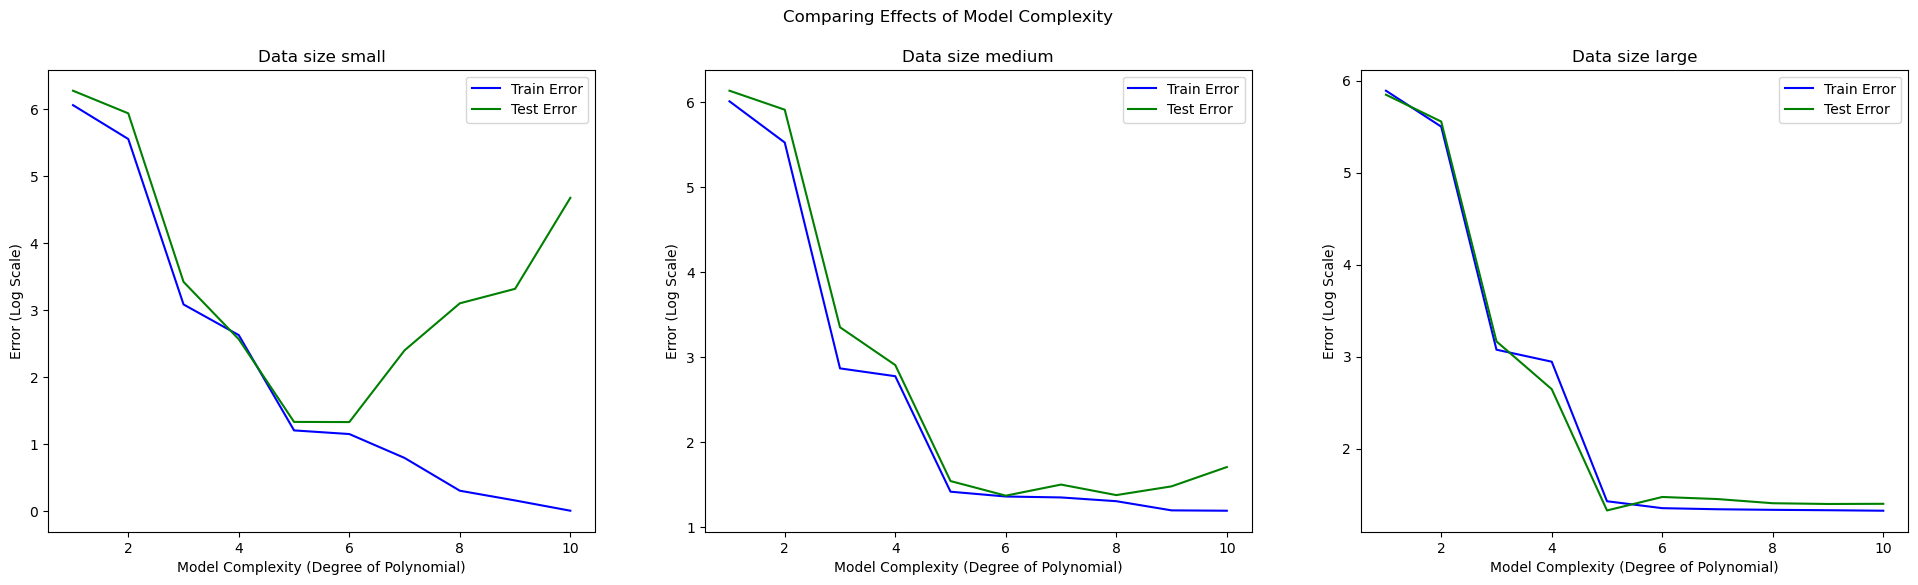

In [8]:
data_id = 1
datasets = load_dataset(data_id) # first benchmark
test_dataset = datasets["test"]
data_sizes = ["small", "medium", "large"]
plt.clf()
fig, axs = plt.subplots(1, 3, figsize=(24, 6))
for i, data_size in enumerate(data_sizes): # iterate over three datasets
    train_dataset = datasets[f"{data_size}_train"]
    train_loss, test_loss, Ks = complexity_experiment(train_dataset, test_dataset) # run the experiment
    axs[i].plot(Ks, np.log(train_loss+1), color = 'b', label='Train Error')
    axs[i].plot(Ks, np.log(test_loss+1), color = 'g', label='Test Error')
    axs[i].set_xlabel("Model Complexity (Degree of Polynomial)")
    axs[i].set_ylabel("Error (Log Scale)")
    axs[i].set_title(f"Data size {data_size}")
    axs[i].legend()
plt.suptitle("Comparing Effects of Model Complexity")
plt.show()

**Questions:** 
- For the small training data, how does the train error changes when increasing complexity? 
- Does the test error follows the same trend? Can you describe the overfitting or underfitting cases? 
- When increasing the dataset size to medium or large, how does the test error curve change?
- What degree of polynomial was used to generate the data?

Please provide justifications.

**Answer:** 
- For small training data, the train error becomes smaller when increasing complexity. This is because initially the complexity is twoo small, which results underfitting. As the model complexity increases, the model fits the training data better because underfitting is reduced.
- The test error becomes smaller at first but then after reaching a certain point, it goes bigger. This is because for small dataset size, when increasing the complexity initially, the model captures more information and underlying about the data. However, after reaching a certain point, if we keep increasing the model complexity, then we will have an overfitting model.
- When increasing the dataset size to medium or large, the test error becomes smaller at first significantly and then does not change a lot when increasing the complexity because for bigger dataset size, overfitting is reduced unless the complexity is extremely large.
- We should use degree 5. At degree 5, both the train error and test error are relevantly small and their gap is also small.

### Regularization coefficient
Finally, you fit the polynomial model using regularized least squares with various regularization coefficients for the second benchmark. 
The mean squared error for both train and test data are visualized as a function of the egularization coefficient.

In [9]:
def regularization_experiment(train_dataset, test_dataset):
    K = 10 # keep K fixed
    l2_coeffs = np.linspace(0, 1.5, 20) # regularization coefficient

    train_loss = np.zeros(len(l2_coeffs), dtype=float)
    test_loss = np.zeros(len(l2_coeffs), dtype=float)

    train_X = train_dataset["X"]
    train_Y = train_dataset["Y"]

    test_X = test_dataset["X"]
    test_Y = test_dataset["Y"]

    for i, l2_coeff in enumerate(l2_coeffs): # iterate over different l2 coefficients
        model = PolynomialRegression(K, l2_coeff)
        model.fit_with_l2_regularization(train_X, train_Y) # fit with l2 regularization

        train_loss[i] = model.compute_mse(train_X, train_Y) # mse on train data
        test_loss[i] = model.compute_mse(test_X, test_Y) # mse on test data
        
    return train_loss, test_loss, l2_coeffs

<Figure size 640x480 with 0 Axes>

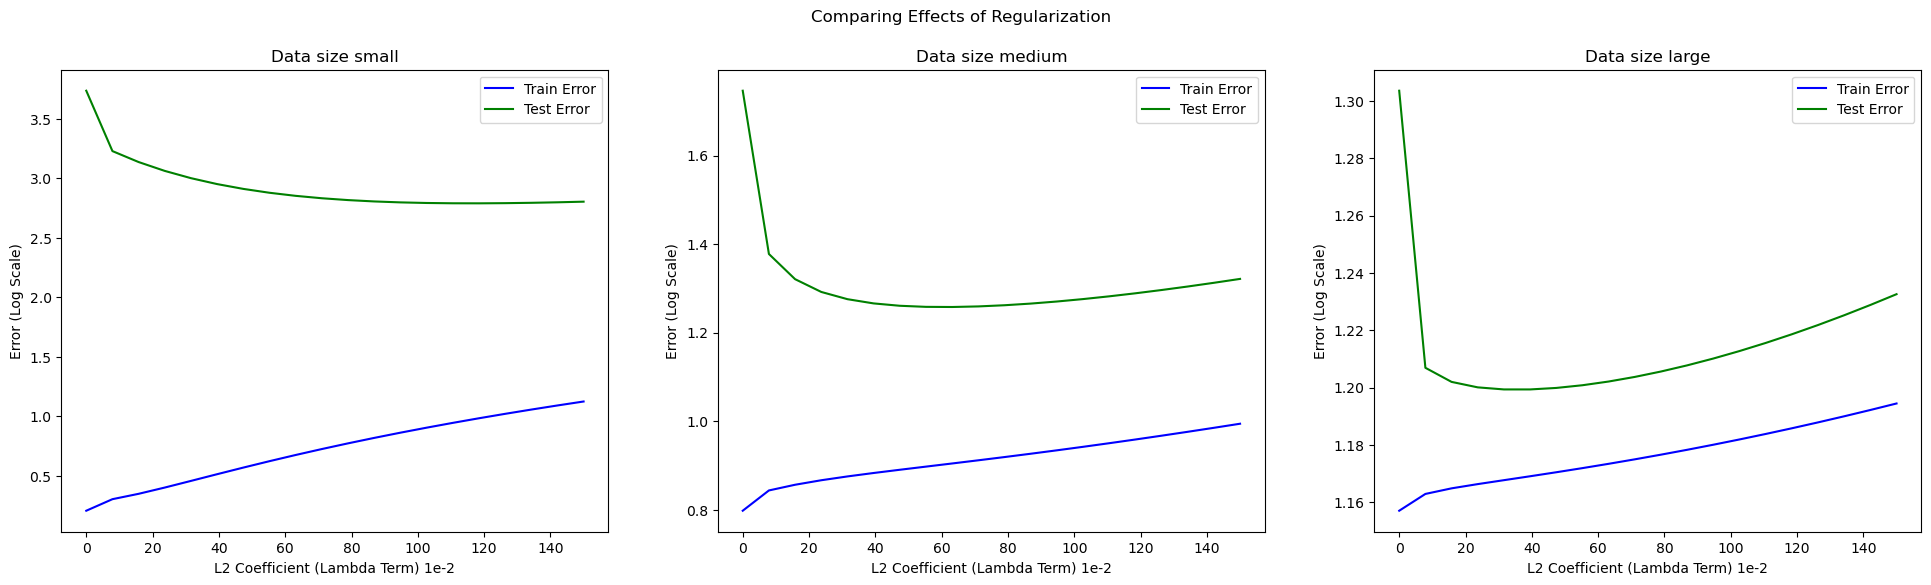

In [10]:
data_id = 2
datasets = load_dataset(data_id) # second benchmark
test_dataset = datasets["test"]

data_sizes = ["small", "medium", "large"]
plt.clf()
fig, axs = plt.subplots(1, 3, figsize=(24, 6))
for i, data_size in enumerate(data_sizes): # iterate over three datasets
    train_dataset = datasets[f"{data_size}_train"]
    train_loss, test_loss, l2_coeffs = regularization_experiment(train_dataset, test_dataset) # run the experiment
    axs[i].plot(l2_coeffs * 1e2, np.log(train_loss+1), color = 'b', label='Train Error')
    axs[i].plot(l2_coeffs * 1e2, np.log(test_loss+1), color = 'g', label='Test Error')
    axs[i].set_title(f"Data size {data_size}")
    axs[i].set_xlabel("L2 Coefficient (Lambda Term) 1e-2")
    axs[i].set_ylabel("Error (Log Scale)")
    axs[i].legend()
plt.suptitle("Comparing Effects of Regularization")
plt.show()

**Question:** 
- How does the error on training data change when increasing the regularization coefficient? 
- What about the test data? Describe overfitting and underfitting cases.
- How does the trend change across datasets of different sizes? 

Please provide justifications.

**Answer:** 
- The error on training data increases mildly when increasing the regularization coefficient. We know that the regularization term is used for reducing overfitting. Therefore, if we add them, the train error increases.
- The test error decreases significantly at first as the regularization term help the model prevent overfitting. However, after reaching a certain point, the test error begins to decrease at a lower rate and gradually becomes bigger since the model becomes too simple which leads to underfitting. 
- As the dataset size increases, the trend of train error does not change. For test error, for the small data size, the error decreases at first and then decreases at a lower rate. For the medium size, the error decreases faster compared to the small dataset at first, and then increases. For the large dataset, the error decreases extremely fast and then increase at higher rate compared to the medium dataset. This is because as dataset becomes larger, the model is more accurate. The increase of L2 coefficient at first becomes much important for reducing overfitting, so the test error decreases at a faster rate. However after that, the change of coefficient does not impact the test error of small dataset a lot because the model is relatively simple.